### Description:
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

[Home Credit](http://www.homecredit.net/about-us.aspx) strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

# Import Libraries and The Data
First, we import necessary libraries, such as:

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

Then, import the data

In [2]:
#load train and test dataset
train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
test = pd.read_csv('/kaggle/input/home-credit-default-risk/application_test.csv')

previous_application = pd.read_csv('/kaggle/input/home-credit-default-risk/previous_application.csv')
installment_payment = pd.read_csv('/kaggle/input/home-credit-default-risk/installments_payments.csv')

# Exploratory Data Analysis
## Exploration: Train and Test Dataset
### - Concise Summary
Display ```info()``` and ```head()``` to familiarize ourself with the train and test dataset.

In [3]:
#concise summary of train dataset
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#concise summary of test dataset
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


The target variable defines if the client had payment difficulties, marked as 1, meaning the client with late payment more than X days, while other all other cases marked as 0.

### - Check For Anomalies
One way to do this is by analyze at the output of ```describe()``` method. We will check for anomalies such as typo, extreme outliers, dtype error between numerical and categorical, etc.

In [5]:
#describe dataset
train.describe(include='all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


Quick observation on the ```describe()``` output :

- The maximum value of DAYS_EMPLOYED feature is a positive value. That seems an value error, since DAYS_EMPLOYED feature description is 'How many days before the application the person started current employment', and supposed to be a negative value. Let's plot ditribution of DAYS_EMPLOYED feature to visualize it.

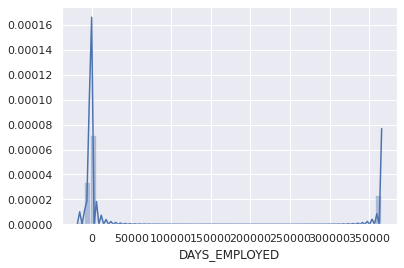

In [6]:
#plot distribution
sns.distplot(train['DAYS_EMPLOYED']);

From the plot above, we can see there are quite a lot outliers with values = 365243. Since we don't have any information whether it was a typo or on purpose, so we will handling it by set this anomalies to a missing value.

In [7]:
#set anomalies to a missing value
train['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace=True)
test['DAYS_EMPLOYED'].replace({365243 : np.nan}, inplace=True)

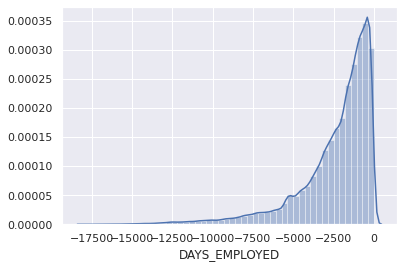

In [8]:
#plot distribution after removing anomalies
sns.distplot(train['DAYS_EMPLOYED']);

Now the distribution looks like what we would expect.

### - Check For Duplicates

In [9]:
#check for duplicated data
print('Duplicated value(s) on the train dataset : ', train.duplicated().sum())
print('Duplicated value(s) on the test dataset  : ', test.duplicated().sum())

Duplicated value(s) on the train dataset :  0
Duplicated value(s) on the test dataset  :  0


There is no duplicated data.

### - Check The Distribution of The Target Array

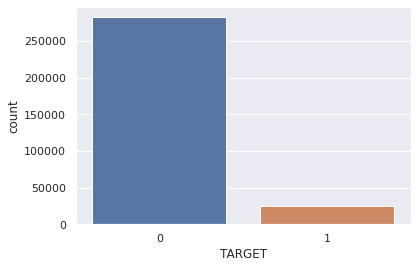

In [10]:
#plot distribution of the target array
sns.countplot(train['TARGET']);

In [11]:
print('Percentage of the target array distribution:')
print('--------------------------------------------')
print(train['TARGET'].value_counts() / len(train['TARGET']) * 100)

Percentage of the target array distribution:
--------------------------------------------
0    91.927118
1     8.072882
Name: TARGET, dtype: float64


From the distribution plot, we can see the dataset is highly unbalanced, the positive target account for 8.07% of all target. To deal with imbalanced data, we can either using a resampling technique such as over- or under-sampling or set ```class_weight``` 'to balanced' when tuning the machine learning model. In this case, we will use ```class_weight```, because resampling technique tends to overfitting when data is highly unbalanced.

### - Check For Missing Values
Check for percentage of missing values in each feature.

In [12]:
print('percentage of missing values for each feature:')
print('----------------------------------------------')
train.isnull().sum().sort_values(ascending=False) / len(train) * 100

percentage of missing values for each feature:
----------------------------------------------


COMMONAREA_AVG                 69.872297
COMMONAREA_MODE                69.872297
COMMONAREA_MEDI                69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
NONLIVINGAPARTMENTS_MEDI       69.432963
                                 ...    
REG_CITY_NOT_LIVE_CITY          0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
SK_ID_CURR                      0.000000
Length: 122, dtype: float64

We will use the strategy where we will fill missing values in categorical features with its ```mode()``` and fill missing values in numerical features with its ```mean()```.

In [13]:
for feature in test.columns:
    if (train[feature].dtype == 'object'):
        #fill missing values in categorical features with its mode() 
        train[feature].fillna(train[feature].mode()[0], inplace=True)
        test[feature].fillna(test[feature].mode()[0], inplace=True)
    else:
        #fill missing values in numerical features with its mean()
        train[feature].fillna(train[feature].mean(), inplace=True)
        test[feature].fillna(test[feature].mean(), inplace=True)

In [14]:
#check for any missing data
print('missing data in the train dataset : ', train.isnull().any().sum())
print('missing data in the test dataset : ', test.isnull().any().sum())

missing data in the train dataset :  0
missing data in the test dataset :  0


## Exploration: Previous Application Dataset
### - Concise Summary
Display ```info()``` and ```head()``` to familiarize ourself with previous application dataset.

In [15]:
#concise summary of train dataset
previous_application.info()
previous_application.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### - Check For Anomalies

In [16]:
#describe dataset
previous_application.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1670214,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1670214,1.670214e+06,...,1670214,1.297984e+06,1670214,1669868,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,...,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,...,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,...,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.923089e+06,2.783572e+05,NaN,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,NaN,1.248418e+01,...,NaN,1.605408e+01,NaN,NaN,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,NaN,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,NaN,3.334028e+00,...,NaN,1.456729e+01,NaN,NaN,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,NaN,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,NaN,0.000000e+00,...,NaN,0.000000e+00,NaN,NaN,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,NaN,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,NaN,1.000000e+01,...,NaN,6.000000e+00,NaN,NaN,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,NaN,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,NaN,1.200000e+01,...,NaN,1.200000e+01,NaN,NaN,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,NaN,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,NaN,1.500000e+01,...,NaN,2.400000e+01,NaN,NaN,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000


Quick observation on the ```describe()``` output :

- AMT_DOWN_PAYMENT has negative value. Let's take a deeper look at the dataset.

In [17]:
previous_application[previous_application['AMT_DOWN_PAYMENT'] < 0]['AMT_DOWN_PAYMENT'].count()

2

There are only 2 negative values, we will set them to 0 since it will not significantly affect the models.

In [18]:
#set negative value to 0
previous_application.loc[previous_application['AMT_DOWN_PAYMENT'] < 0 , 'AMT_DOWN_PAYMENT'] = 0

- DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE and DAYS_TERMINATION features have a positive value. That seems an value error, since those features description are 'Relative to application date of current application when ... ', and supposed to be a negative value. Let's plot ditribution of those features to visualize it.

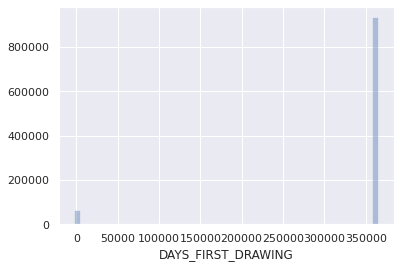

In [19]:
sns.distplot(previous_application['DAYS_FIRST_DRAWING'], kde=False);

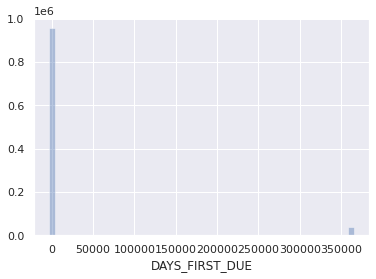

In [20]:
sns.distplot(previous_application['DAYS_FIRST_DUE'], kde=False);

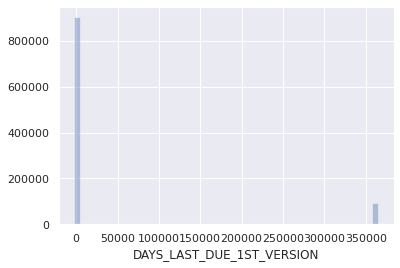

In [21]:
sns.distplot(previous_application['DAYS_LAST_DUE_1ST_VERSION'], kde=False);

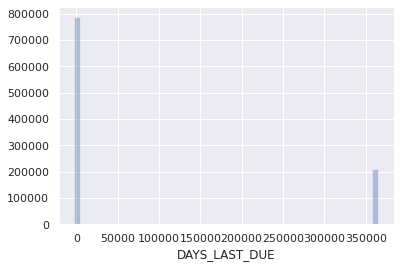

In [22]:
sns.distplot(previous_application['DAYS_LAST_DUE'], kde=False);

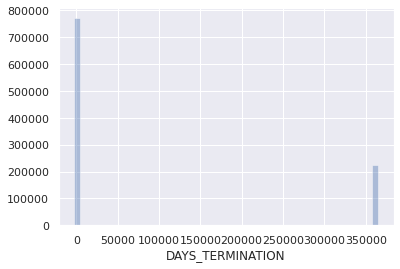

In [23]:
sns.distplot(previous_application['DAYS_TERMINATION'], kde=False);

Same as before, Since we don't have any information whether it was a typo or on purpose, so we will handling it by set this anomalies to a missing value.

In [24]:
#set anomalies to a missing value
previous_application['DAYS_FIRST_DRAWING'].replace({365243 : np.nan}, inplace=True)
previous_application['DAYS_FIRST_DUE'].replace({365243 : np.nan}, inplace=True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace({365243 : np.nan}, inplace=True)
previous_application['DAYS_LAST_DUE'].replace({365243 : np.nan}, inplace=True)
previous_application['DAYS_TERMINATION'].replace({365243 : np.nan}, inplace=True)

plot distribution after removing anomalies.

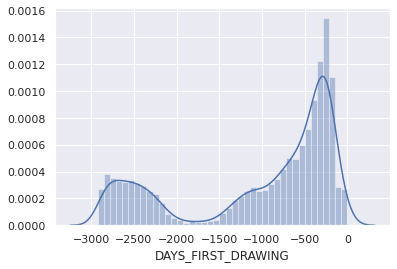

In [25]:
sns.distplot(previous_application['DAYS_FIRST_DRAWING']);

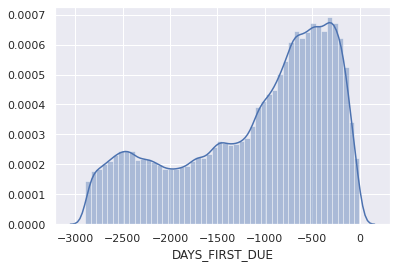

In [26]:
sns.distplot(previous_application['DAYS_FIRST_DUE']);

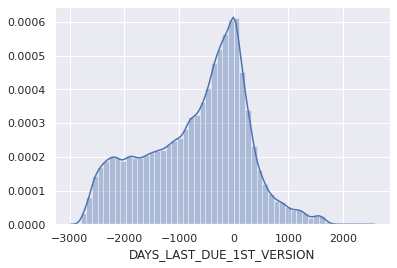

In [27]:
sns.distplot(previous_application['DAYS_LAST_DUE_1ST_VERSION']);

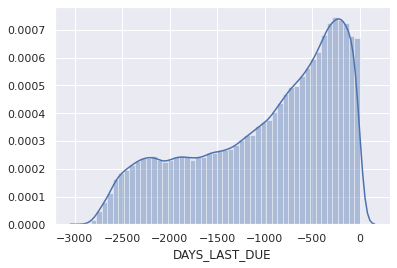

In [28]:
sns.distplot(previous_application['DAYS_LAST_DUE']);

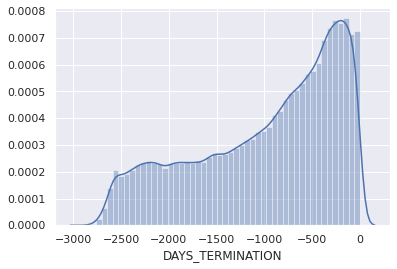

In [29]:
sns.distplot(previous_application['DAYS_TERMINATION']);

### - Check For Missing Values

In [30]:
print('percentage of missing values for each feature:')
print('----------------------------------------------')
previous_application.isnull().sum().sort_values(ascending=False) / len(previous_application) * 100

percentage of missing values for each feature:
----------------------------------------------


RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
DAYS_FIRST_DRAWING             96.245691
DAYS_TERMINATION               53.824121
RATE_DOWN_PAYMENT              53.636480
AMT_DOWN_PAYMENT               53.636480
DAYS_LAST_DUE                  52.944473
NAME_TYPE_SUITE                49.119754
DAYS_LAST_DUE_1ST_VERSION      45.918008
DAYS_FIRST_DUE                 42.731650
NFLAG_INSURED_ON_APPROVAL      40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_CONTRACT_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
SK_ID_CURR                      0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
AMT_APPLICATION                 0.000000
NAME_PAYMENT_TYPE               0.000000
NAME_CASH_LOAN_P

In [31]:
for feature in previous_application.columns:
    if (previous_application[feature].dtype == 'object'):
        #fill missing values in categorical features with its mode() 
        previous_application[feature].fillna(previous_application[feature].mode()[0], inplace=True)
    else:
        #fill missing values in numerical features with its mean() 
        previous_application[feature].fillna(previous_application[feature].mean(), inplace=True)

In [32]:
#check for any missing data
print('missing data in previous application dataset : ', previous_application.isnull().any().sum())

missing data in previous application dataset :  0


## Exploration: Installment Payment
### - Concise Summary
Display ```info()``` and ```head()``` to familiarize ourself with installment payment dataset.

In [33]:
#concise summary
installment_payment.info()
installment_payment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


### - Check For Anomalies

In [34]:
#describe dataset
installment_payment.describe(include='all')

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


No anomalies were found.

### - Check For Missing Values

In [35]:
print('percentage of missing values for each feature:')
print('----------------------------------------------')
installment_payment.isnull().sum().sort_values(ascending=False) / len(installment_payment) * 100

percentage of missing values for each feature:
----------------------------------------------


AMT_PAYMENT               0.021352
DAYS_ENTRY_PAYMENT        0.021352
AMT_INSTALMENT            0.000000
DAYS_INSTALMENT           0.000000
NUM_INSTALMENT_NUMBER     0.000000
NUM_INSTALMENT_VERSION    0.000000
SK_ID_CURR                0.000000
SK_ID_PREV                0.000000
dtype: float64

In [36]:
for feature in installment_payment.columns:
    if (installment_payment[feature].dtype == 'object'):
        #fill missing values in categorical features with its mode() 
        installment_payment[feature].fillna(installment_payment[feature].mode()[0], inplace=True)
    else:
        #fill missing values in numerical features with its mean() 
        installment_payment[feature].fillna(installment_payment[feature].mean(), inplace=True)

In [37]:
#check for any missing data
print('missing data in installment payment dataset : ', installment_payment.isnull().any().sum())

missing data in installment payment dataset :  0


# Feature Engineering
## Previous Application Dataset
### - Feature Creation

In [38]:
#for each ID, count the number of previous application
prev_app_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR', as_index=False).count()
prev_app_count.rename(columns={'SK_ID_PREV':'PREV_APP_COUNT'}, inplace=True)

#merge to train and test dataset
train = pd.merge(train, prev_app_count, on='SK_ID_CURR')
test = pd.merge(test, prev_app_count, on='SK_ID_CURR')

prev_app_count.head()

,SK_ID_CURR,PREV_APP_COUNT
0,100001,1
1,100002,1
2,100003,3
3,100004,1
4,100005,2


In [39]:
#recent application for each ID
recent_app = previous_application[['SK_ID_CURR', 'DAYS_DECISION']].groupby('SK_ID_CURR', as_index=False).max()
recent_app.rename(columns={'DAYS_DECISION':'RECENT_APP'}, inplace=True)

#merge to train and test dataset
train = pd.merge(train, recent_app, on='SK_ID_CURR')
test = pd.merge(test, recent_app, on='SK_ID_CURR')

recent_app.head()

,SK_ID_CURR,RECENT_APP
0,100001,-1740
1,100002,-606
2,100003,-746
3,100004,-815
4,100005,-315


In [40]:
#for each ID, average values for each features in previous applications
prev_app_mean = previous_application.groupby('SK_ID_CURR', as_index=False).mean()
prev_app_mean.drop(['SK_ID_PREV'], axis=1, inplace=True)

#prefix addition
prev_app_mean.columns = ['PREV_' + col_name + '_MEAN' if col_name != 'SK_ID_CURR' else col_name for col_name in prev_app_mean.columns]

#merge to train and test dataset
train = pd.merge(train, prev_app_mean, on='SK_ID_CURR')
test = pd.merge(test, prev_app_mean, on='SK_ID_CURR')

prev_app_mean.head()

,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_NFLAG_LAST_APPL_IN_DAY_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_RATE_INTEREST_PRIMARY_MEAN,PREV_RATE_INTEREST_PRIVILEGED_MEAN,PREV_DAYS_DECISION_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_DAYS_LAST_DUE_MEAN,PREV_DAYS_TERMINATION_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_MEAN
0,100001,3951.00000,24835.50,23787.00,2520.00000,24835.500000,13.000000,1.0,0.104326,0.188357,0.773503,-1740.0,23.0,8.000000,-1035.246791,-1709.000000,-1499.000000,-1619.000000,-1612.000000,0.000000
1,100002,9251.77500,179055.00,179055.00,0.00000,179055.000000,9.000000,1.0,0.000000,0.188357,0.773503,-606.0,500.0,24.000000,-1035.246791,-565.000000,125.000000,-25.000000,-17.000000,0.000000
2,100003,56553.99000,435436.50,484191.00,4527.46738,435436.500000,14.666667,1.0,0.059899,0.188357,0.773503,-1305.0,533.0,10.000000,-1035.246791,-1274.333333,-1004.333333,-1054.333333,-1047.333333,0.666667
3,100004,5357.25000,24282.00,20106.00,4860.00000,24282.000000,5.000000,1.0,0.212008,0.188357,0.773503,-815.0,30.0,4.000000,-1035.246791,-784.000000,-694.000000,-724.000000,-714.000000,0.000000
4,100005,10384.16033,22308.75,20076.75,5580.70107,136232.389642,10.500000,1.0,0.094300,0.188357,0.773503,-536.0,18.0,14.027041,-1035.246791,-906.291514,-526.579087,-731.089564,-719.187611,0.166285


## Installment Payment Dataset
### - Feature Creation

In [41]:
#for each ID, count the number of installment payment
inst_pay_count = installment_payment[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR', as_index=False).count()
inst_pay_count.rename(columns={'SK_ID_PREV':'INST_PAY_COUNT'}, inplace=True)

#merge to train and test dataset
train = pd.merge(train, inst_pay_count, on='SK_ID_CURR')
test = pd.merge(test, inst_pay_count, on='SK_ID_CURR')

inst_pay_count.head()

,SK_ID_CURR,INST_PAY_COUNT
0,100001,7
1,100002,19
2,100003,25
3,100004,3
4,100005,9


In [42]:
#for each ID, average values for each features in installment payment
inst_pay_mean = installment_payment.groupby('SK_ID_CURR', as_index=False).mean()
inst_pay_mean.drop(['SK_ID_PREV'], axis=1, inplace=True)

#prefix addition
inst_pay_mean.columns = ['INST_' + col_name + '_MEAN' if col_name != 'SK_ID_CURR' else col_name for col_name in inst_pay_mean.columns]

#merge to train and test dataset
train = pd.merge(train, inst_pay_mean, on='SK_ID_CURR')
test = pd.merge(test, inst_pay_mean, on='SK_ID_CURR')

inst_pay_mean.head()

,SK_ID_CURR,INST_NUM_INSTALMENT_VERSION_MEAN,INST_NUM_INSTALMENT_NUMBER_MEAN,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_AMT_INSTALMENT_MEAN,INST_AMT_PAYMENT_MEAN
0,100001,1.142857,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143
1,100002,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105
2,100003,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000
3,100004,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000
4,100005,1.111111,5.000000,-586.000000,-609.555556,6240.205000,6240.205000


## Train and Test Dataset
### - Feature Creation
- DEBT_BURDEN_RATIO : The ratio of the debts you have to your average monthly income. Let's say the lenders set DBR threshold to 35%
- ANNUITY_TO_DBR : Percentage of annuity to Debt Burden Ratio
- ANNUITY_TO_CREDIT : Percentage of annuity to approved credit

In [43]:
main_dataset = [train, test] 

for dataset in main_dataset:
    dataset['DEBT_BURDEN_RATIO'] = dataset['AMT_INCOME_TOTAL'] * (35/100)
    dataset['ANNUITY_TO_DBR'] = (dataset['AMT_ANNUITY'] / dataset['DEBT_BURDEN_RATIO']) * 100
    dataset['ANNUITY_TO_CREDIT'] = (dataset['AMT_ANNUITY'] / dataset['AMT_CREDIT']) * 100

train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,INST_PAY_COUNT,INST_NUM_INSTALMENT_VERSION_MEAN,INST_NUM_INSTALMENT_NUMBER_MEAN,INST_DAYS_INSTALMENT_MEAN,INST_DAYS_ENTRY_PAYMENT_MEAN,INST_AMT_INSTALMENT_MEAN,INST_AMT_PAYMENT_MEAN,DEBT_BURDEN_RATIO,ANNUITY_TO_DBR,ANNUITY_TO_CREDIT
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,19,1.052632,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,70875.0,34.850794,6.074927
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,25,1.040000,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,94500.0,37.776190,2.759832
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,3,1.333333,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,23625.0,28.571429,5.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,16,1.125000,4.437500,-252.250000,-271.625000,62947.088438,62947.088438,47250.0,62.828571,9.494135
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,66,1.166667,7.045455,-1028.606061,-1032.242424,12666.444545,12214.060227,42525.0,51.417989,4.262281


### - Correlations
Finding correlations of all features with the target.

In [44]:
#correlations
train.corr()['TARGET'].sort_values(ascending=False)[1:]

DAYS_BIRTH                     0.080664
DAYS_EMPLOYED                  0.071049
DAYS_LAST_PHONE_CHANGE         0.061011
REGION_RATING_CLIENT_W_CITY    0.060338
REGION_RATING_CLIENT           0.058060
                                 ...   
AMT_GOODS_PRICE               -0.037133
EXT_SOURCE_1                  -0.099832
EXT_SOURCE_3                  -0.156323
EXT_SOURCE_2                  -0.159575
FLAG_MOBIL                          NaN
Name: TARGET, Length: 136, dtype: float64

In [45]:
#drop features based on correlations
features_to_be_dropped = ['SK_ID_CURR',
                          #'TARGET',
                          'FLAG_MOBIL']

#store target array
target_array = train['TARGET']
train.drop('TARGET', axis=1, inplace=True)
#target_array_train = train['TARGET']
#target_array_test = test['TARGET']

#store test's LN_ID
SK_ID_CURR = test['SK_ID_CURR']

#drop features
train.drop(features_to_be_dropped, axis=1, inplace=True)
test.drop(features_to_be_dropped, axis=1, inplace=True)

#print shape
print('train shape: ', train.shape)
print('test shape: ', test.shape)

train shape:  (290131, 150)
test shape:  (47664, 150)


### - One-Hot Encoding

In [46]:
train['SOURCE'] = 'train'
test['SOURCE'] = 'test'

#combine train and test dataset
combined_data = pd.concat([train, test], ignore_index=True)

print(train.shape, test.shape, combined_data.shape)

(290131, 151) (47664, 151) (337795, 151)


In [47]:
#create dummies
combined_data = pd.get_dummies(combined_data, drop_first=True)
combined_data.shape

(337795, 257)

In [48]:
combined_data.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes,SOURCE_train
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,...,0,0,0,0,0,0,1,0,0,1
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,...,0,0,0,0,0,0,0,0,0,1
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,...,0,0,0,0,0,1,0,0,0,1
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,-9833.0,-2437,...,0,0,0,0,0,1,0,0,0,1
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,-4311.0,-3458,...,0,0,0,0,0,1,0,0,0,1


## Creating features matrix (X) and target array (y)

In [49]:
X = combined_data[combined_data['SOURCE_train'] == 1].copy()
y = target_array

X_test = combined_data[combined_data['SOURCE_train'] == 0].copy()

X.drop(['SOURCE_train'], axis=1, inplace=True)
X_test.drop(['SOURCE_train'], axis=1, inplace=True)

### - Check For Overfitting
Check for overfitting caused by redundant zeroes:

In [50]:
def overfit_zeros(df, limit=99.95):
    """df (dataframe)  : data
       limit (float)   : limit to be called overfitted
       Returns a list of features that have redundant zeroes and caused overfitting.
    """
    overfit = []
    
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > limit:
            overfit.append(i)
            
    overfit = list(overfit)
    
    return overfit

In [51]:
#list of overfitted features
overfitted_features = overfit_zeros(X)

#print overfitted features
print('Overfitted features :')
print('---------------------')
for feature in overfitted_features:
    print(feature)

Overfitted features :
---------------------
FLAG_DOCUMENT_2
FLAG_DOCUMENT_4
FLAG_DOCUMENT_7
FLAG_DOCUMENT_10
FLAG_DOCUMENT_12
FLAG_DOCUMENT_17
FLAG_DOCUMENT_19
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
CODE_GENDER_XNA
NAME_INCOME_TYPE_Maternity leave
NAME_INCOME_TYPE_Student
NAME_INCOME_TYPE_Unemployed
ORGANIZATION_TYPE_Industry: type 10
ORGANIZATION_TYPE_Industry: type 13
ORGANIZATION_TYPE_Industry: type 6
ORGANIZATION_TYPE_Industry: type 8
ORGANIZATION_TYPE_Religion
ORGANIZATION_TYPE_Trade: type 4
ORGANIZATION_TYPE_Trade: type 5


In [52]:
#drop overfitted features
X.drop(overfitted_features, axis=1, inplace=True)
X_test.drop(overfitted_features, axis=1, inplace=True)

### - Standardization

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Creating A Model
## Model Selection: CatBoostClassifier
CatBoost name comes from two words, Category and Boosting. Boost comes from gradient boosting machine learning algorithm as this library is based on gradient boosting library. Gradient boosting is a powerful machine learning algorithm that is widely applied to multiple types of business challenges like fraud detection, recommendation items, forecasting and it performs well.

We begin by splitting data into two subsets: for training data and for validating data.

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=7)

In [55]:
from catboost import CatBoostClassifier

#tuning the model
cat_boost = CatBoostClassifier(iterations = 1000,
                               scale_pos_weight = 11, #from the ratio between majority class to minority class
                               learning_rate = 0.01, 
                               depth = 8,
                               eval_metric = 'AUC',
                               random_seed = 7)

#fitting
cat_boost.fit(X_train, y_train, 
              eval_set=(X_eval, y_eval))

0:	test: 0.7059015	best: 0.7059015 (0)	total: 275ms	remaining: 4m 34s
1:	test: 0.7124512	best: 0.7124512 (1)	total: 485ms	remaining: 4m 1s
2:	test: 0.7160409	best: 0.7160409 (2)	total: 713ms	remaining: 3m 56s
3:	test: 0.7180279	best: 0.7180279 (3)	total: 900ms	remaining: 3m 44s
4:	test: 0.7180803	best: 0.7180803 (4)	total: 1.09s	remaining: 3m 36s
5:	test: 0.7182815	best: 0.7182815 (5)	total: 1.28s	remaining: 3m 32s
6:	test: 0.7197148	best: 0.7197148 (6)	total: 1.48s	remaining: 3m 29s
7:	test: 0.7202805	best: 0.7202805 (7)	total: 1.66s	remaining: 3m 26s
8:	test: 0.7203123	best: 0.7203123 (8)	total: 1.86s	remaining: 3m 25s
9:	test: 0.7200538	best: 0.7203123 (8)	total: 2.05s	remaining: 3m 22s
10:	test: 0.7206164	best: 0.7206164 (10)	total: 2.25s	remaining: 3m 22s
11:	test: 0.7202666	best: 0.7206164 (10)	total: 2.45s	remaining: 3m 21s
12:	test: 0.7207377	best: 0.7207377 (12)	total: 2.65s	remaining: 3m 21s
13:	test: 0.7212261	best: 0.7212261 (13)	total: 2.85s	remaining: 3m 20s
14:	test: 0.7

## Metrics
The results will be on evaluated on area under the ROC (Receiver Operating Characteristic) curve between the predicted probability and the observed target, because we deal with imbalanced dataset. We should not use accuracy score beacuse it will be bias to majority class.

The Area Under the ROC Curve, known as ROC AUC, measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). AUC ranges in value from 0 to 1.

In [56]:
from sklearn.metrics import roc_auc_score

#probability
cat_boost_positive_prob = cat_boost.predict_proba(X_eval)[:, 1]

print('CatBoostClassifier ROC AUC score : ', roc_auc_score(y_eval, cat_boost_positive_prob))

CatBoostClassifier ROC AUC score :  0.7632799472371692


## Feature Importances
```feature_importances_``` attribute gives us a list where the higher score the more important that feature.

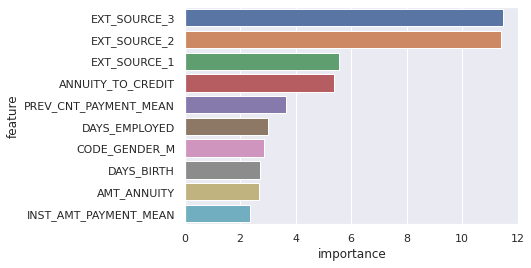

In [57]:
#feature importances
feature_importances = pd.DataFrame({'feature'   : X_train.columns,
                                    'importance': cat_boost.feature_importances_})

#plot top 10 feature importances
sns.barplot(x='importance', y='feature', data=feature_importances.sort_values('importance', ascending=False)[:10]);

## Make A Prediction
In this section, we will make a predicted probability for positive class, i.e. client had payment difficulties, and sorted/ranked them from the highest probability to the lowest. From there, the lenders can set a threshold to determine how much of the potential risk that can be accepted and choose who are eligible for a loan.

In [58]:
#create a predicted probability dataframe
prediction = pd.DataFrame({'SK_ID_CURR': SK_ID_CURR,
                           'TARGET_POSITIVE_PROB': cat_boost.predict_proba(X_test)[:, 1]})

#sort/ranked from the highest probability to the lowest
prediction = prediction.sort_values('TARGET_POSITIVE_PROB', ascending=False)

prediction

,SK_ID_CURR,TARGET_POSITIVE_PROB
43898,428801,0.934157
39494,396995,0.929001
22314,265895,0.928221
18347,236266,0.928100
8678,164766,0.927843
...,...,...
9289,169175,0.027842
24711,283816,0.026786
5255,139208,0.026640
9785,172599,0.024407
